#
Projeto de Predição do preço de imóveis

Este projeto é um treinamento com base no intensivo promovido gratuitamente pela Alura. No decorrer do arquivo, uso e explico tecnicas da linguagem Python e suas bibliotecas usadas em Ciência de Dados.

##
Visãogeral sobre os dados

Inicialmente foi feita a importação da biblioteca Pandas e a leitura do arquivo com seu método read(), seguindo com head() para mostrar as primeiras linhas da planilha.

In [2]:
import pandas as pd
PlanilhaImoveis = "C:/Users/Usuário/Roberto/Estudo/Python/DataScience/dados_imoveis.csv"
dados = pd.read_csv(PlanilhaImoveis)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Após salvar o caminho do arquivo lido pelo Pandas em uma variável, é possível trabalhar com ela de várias maneiras, além de diversos métodos. Um deles é usado para obter as informações do tipo primitivo das colunas da tabela e verificar dados não nulos, chamado .info().

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Uma outra forma de obter uma visualização geral dos dados é o .sample() que reune uma quantidade x de linhas aleatórias da tabela.

In [11]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3351,NaN,Jardim Leonor,São Paulo,413,6,6,7,R$ 2.490.000
5639,Rua Laiana,Alto de Pinheiros,São Paulo,365,3,7,6,R$ 5.500.000
9791,Rua General Pereira da Cunha,Retiro Morumbi,São Paulo,2000,6,10,12,R$ 19.000.000
8836,NaN,Vila Ayrosa,São Paulo,205,3,3,2,R$ 340.000
3953,NaN,Jardim Paulistano,São Paulo,200,3,4,1,R$ 2.650.000
3559,Rua D'Ouro,Jardim Luzitânia,São Paulo,367,4,5,6,R$ 7.000.000
7819,"Rua Manuel Silva Neto, 231",Vila Macedópolis,São Paulo,210,4,2,3,R$ 740.000
8511,Rua São Benedito,Santo Amaro,São Paulo,464,4,6,4,R$ 12.000\n /Mês
5266,Rua Maracaí,Aclimação,São Paulo,400,4,2,4,R$ 2.500.000
9399,Rua Cotoxó,Perdizes,São Paulo,287,4,4,3,R$ 2.356.800


Métodos matemáticos também podem ser aplicados nas tabelas, basta que na variável que guarda os dados seja mencionada a coluna e em seguida a operação, como a seguir:

In [12]:
dados.Metragem.mean()

442.30065947242207

Passando entre colchetes para a variável uma string com o nome da coluna, é possivel buscar alguma ocorrência. No caso a seguir também foi realizada a soma dessas ocorrências.

In [13]:
sum((dados["Bairro"] == "Vila Mariana"))

184

Quando colocamos algo entre os colchetes da variável que guarda os dados, especificamos qual trecho de dados queremos que seja exibida. No caso abaixo guardei na variácel ImoveisVM a tabela dados onde na coluna Bairro possue o valor igual à Vila Mariana.

In [14]:
ImoveisVM = dados[(dados["Bairro"] == "Vila Mariana")]
ImoveisVM

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


Após salvar a tabela em uma variável, podemos trabalhar com ela.

In [15]:
ImoveisVM["Metragem"].mean()

233.6195652173913

A partir das tecnicas anteriores, foi salvo na variável NumImoveisBairros a contagem dos valores da coluna Bairro através do método .value_counts().


In [16]:
NumImoveisBairros = dados['Bairro'].value_counts()
NumImoveisBairros

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

In [30]:
ImoveisVM['Rua'].value_counts()

Rua Pero Correia               12
Rua Morgado de Mateus           8
Rua Embuaçu                     5
Rua Sousa Ramos                 5
Rua Brás Lourenço               4
                               ..
Rua da União                    1
Rua Victor Brecheret            1
Rua Potenji                     1
Avenida Lins de Vasconcelos     1
Rua França Pinto                1
Name: Rua, Length: 89, dtype: int64

In [ ]:
E essa, uma representação gráfica da quantidade de imóveis por bairro em um gráfico criado pelo método plot.bar().

<AxesSubplot:>

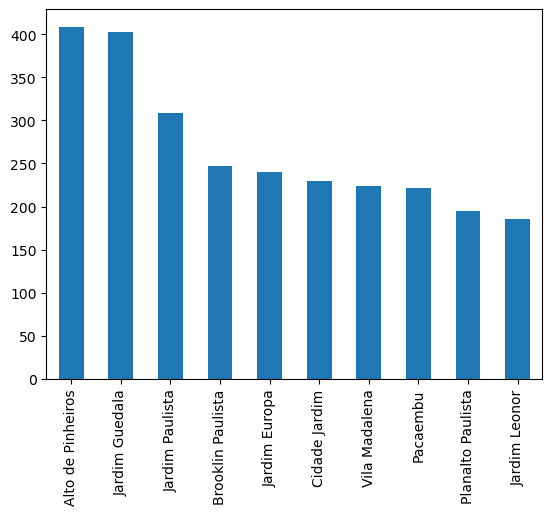

In [31]:
NumImoveisBairros.head(10).plot.bar()

1 - média da metragem por bairro
5 - descobrir quais são os bairros não tem nome de rua

##
Seleção, limpeza e contagem de dados

Outra maneira de selecionar dados é usando o groupby(). Uma coluna foi usada para agrupar e a outra foi tirado a média. Em seguida o .sort_values() foi usado para organizar em ordem decrescente e exibido os 10 primeiros. 

In [24]:
BairrosMetragem = dados.groupby('Bairro')['Metragem'].mean()
BairrosMetragem.sort_values(ascending=False).head(10)

Bairro
Sítio Represa                 37000.000000
Vila Castelo                   2850.000000
Jardim Guedala                 2486.640199
Jardim das Camélias            1700.000000
Chácara Flora                  1260.727273
Jardim Sílvia (Zona Oeste)     1189.258065
Retiro Morumbi                 1084.045455
Vila Aurora (Zona Norte)       1082.500000
Paineiras do Morumbi            757.266667
Vila Ivone                      722.500000
Name: Metragem, dtype: float64

Na mostragem das informações com o .info() é possível reparar que alguns campos possuem valores nulos. Aqui foram contados, por bairro, a quantidade de valores nulos.

In [27]:
RuaBairro = dados[['Rua', 'Bairro']]
RuaNanFilter = RuaBairro[(RuaBairro["Rua"].isnull())]
RuaNanFilter.Bairro.value_counts()

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64

Filtando por uma coluna é possível fazer contagens de ocorrências de outras colunas como o exemplo:

In [34]:
JG = dados[(dados["Bairro"] == "Jardim Guedala")]
JG.Rua.value_counts()

Rua Sanharó                           14
Rua Doutor Queirós Guimarães          12
Rua Albertina de Oliveira Godinho     10
Rua Araporé                           10
Rua Olegário Mariano                   9
                                      ..
Rua Conseguina                         1
Rua Magalhães de Araújo, 84            1
Rua Doutor Queirós Guimarães, 216      1
Rua Santa Judite                       1
Rua Aleutas                            1
Name: Rua, Length: 66, dtype: int64